## Importing the dataset form drive

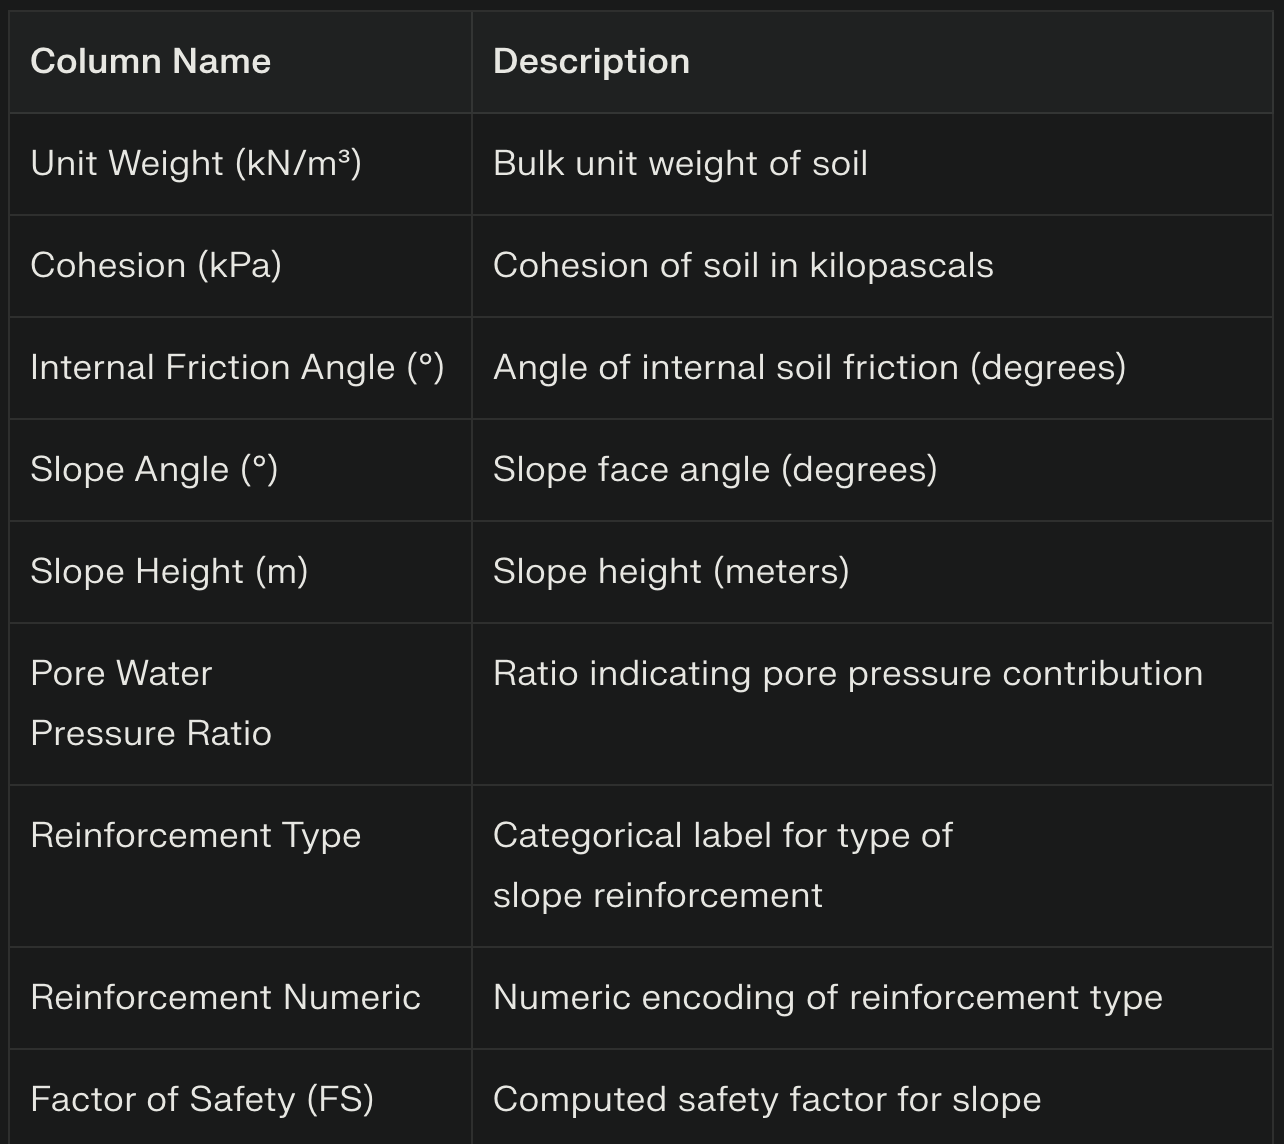

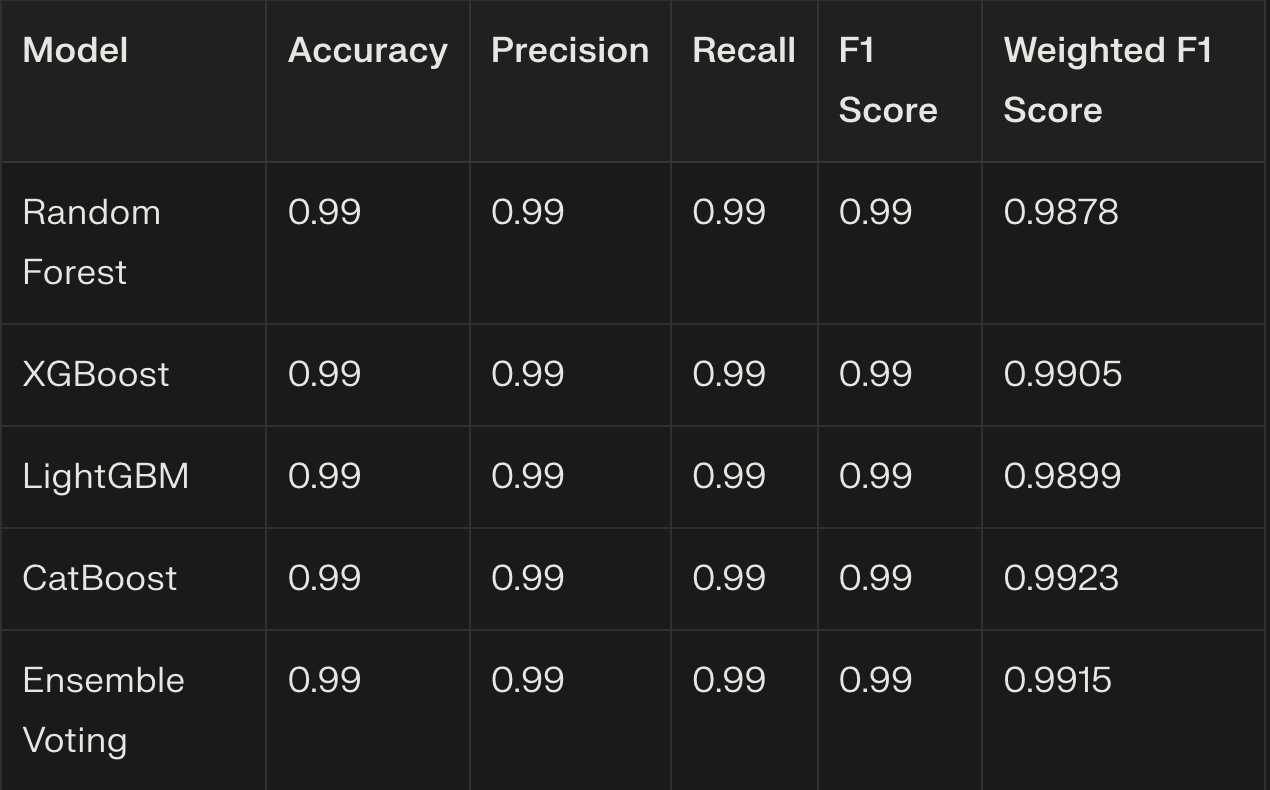

In [ ]:
import zipfile
import os

# Extract the zip to a folder
zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/slope_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))



/content/slope_data/slope_stability_dataset.csv


In [ ]:
df = pd.read_csv('/content/slope_data/slope_stability_dataset.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Check data preview and target distribution
print(df.head())


   Unit Weight (kN/m³)  Cohesion (kPa)  Internal Friction Angle (°)  \
0            18.745401       21.813837                    38.249958   
1            24.507143       19.981044                    24.612800   
2            22.319939       12.926926                    28.665992   
3            20.986585       32.327000                    36.582016   
4            16.560186       26.448087                    32.052234   

   Slope Angle (°)  Slope Height (m)  Pore Water Pressure Ratio  \
0        41.907228         18.451042                   0.847237   
1        32.964623          9.266800                   0.494517   
2        58.224926         10.686165                   0.195466   
3        20.948923         13.130201                   0.736642   
4        39.392821         14.164400                   0.418678   

  Reinforcement Type  Reinforcement Numeric  Factor of Safety (FS)  
0           Drainage                      3               2.613692  
1      Geosynthetics            

# Data cleaning & Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score



# Basic Data Cleaning

# Checking for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing values or impute
df = df.dropna()

# Encoding categorical columns if needed (Reinforcement Type)
df = pd.get_dummies(df, columns=['Reinforcement Type'], drop_first=True)

# Creating binary target based on Factor of Safety
df['Stability_Label'] = df['Factor of Safety (FS)'].apply(lambda x: 0 if x >= 1 else 1)

# Defining features and target (exclude original FS and label)
X = df.drop(columns=['Factor of Safety (FS)', 'Stability_Label'])
y = df['Stability_Label']

# 5. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features (after one-hot encoding)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred = rf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Missing values per column:
 Unit Weight (kN/m³)            0
Cohesion (kPa)                 0
Internal Friction Angle (°)    0
Slope Angle (°)                0
Slope Height (m)               0
Pore Water Pressure Ratio      0
Reinforcement Type             0
Reinforcement Numeric          0
Factor of Safety (FS)          0
Stability_Label                0
dtype: int64
Classification Report:
              precision    recall  f1-score   support

      Stable       0.99      0.99      0.99      1941
    Unstable       0.82      0.76      0.79        59

    accuracy                           0.99      2000
   macro avg       0.91      0.88      0.89      2000
weighted avg       0.99      0.99      0.99      2000

Weighted F1 Score: 0.9877956497006799


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score



# Create binary target based on Factor of Safety
df['Stability_Label'] = df['Factor of Safety (FS)'].apply(lambda x: 0 if x >= 1 else 1)

# Drop 'Factor of Safety (FS)' and redundant columns for features
X = df.drop(columns=['Factor of Safety (FS)', 'Stability_Label', 'Reinforcement Type'])
# Include 'Reinforcement Numeric' if appropriate
y = df['Stability_Label']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (only on numerical columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediction and Evaluation
y_pred = rf.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Classification Report:
              precision    recall  f1-score   support

      Stable       0.99      0.99      0.99      1941
    Unstable       0.80      0.80      0.80        59

    accuracy                           0.99      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.99      0.99      0.99      2000

Weighted F1 Score: 0.988


## VISULISATIONS

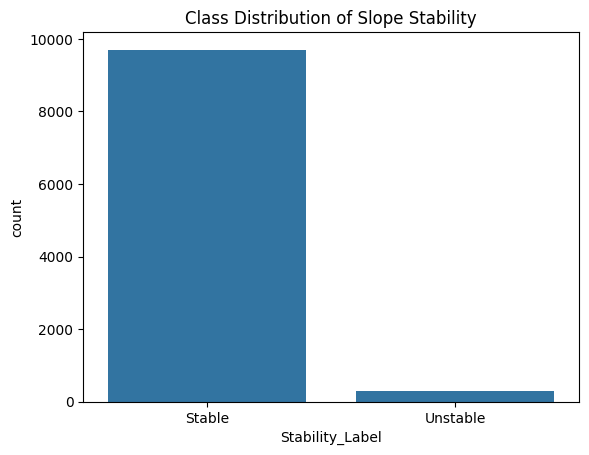

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stability Label distribution
sns.countplot(x='Stability_Label', data=df)
plt.xticks(ticks=[0,1], labels=['Stable', 'Unstable'])
plt.title('Class Distribution of Slope Stability')
plt.show()


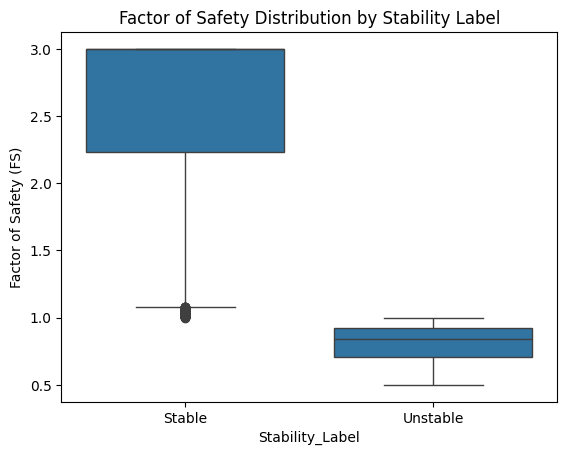

In [ ]:
# Example: Distribution of Factor of Safety for classes
sns.boxplot(x='Stability_Label', y='Factor of Safety (FS)', data=df)
plt.xticks(ticks=[0,1], labels=['Stable', 'Unstable'])
plt.title('Factor of Safety Distribution by Stability Label')
plt.show()


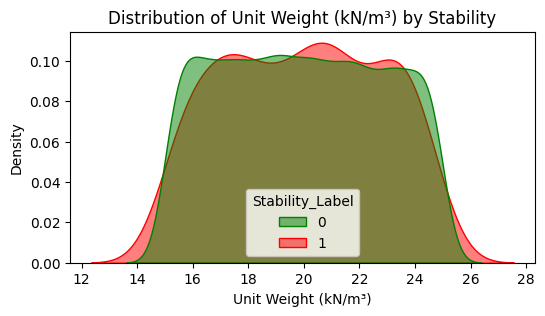

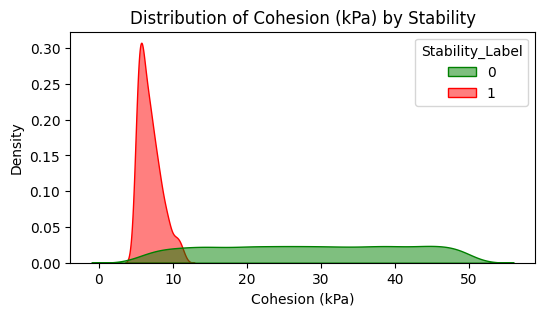

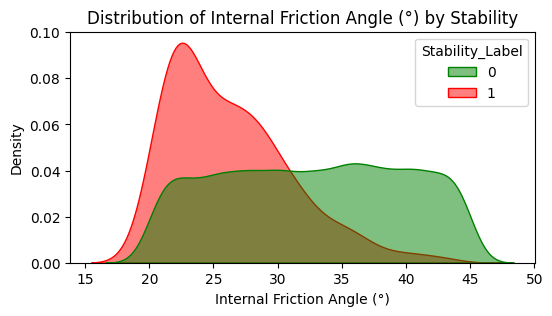

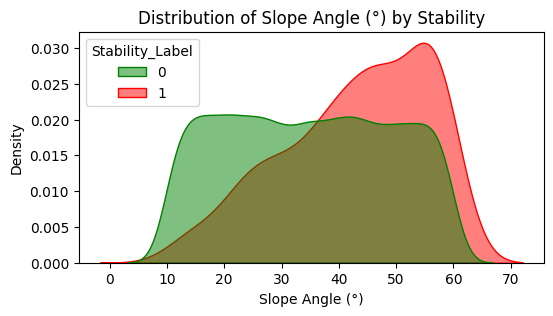

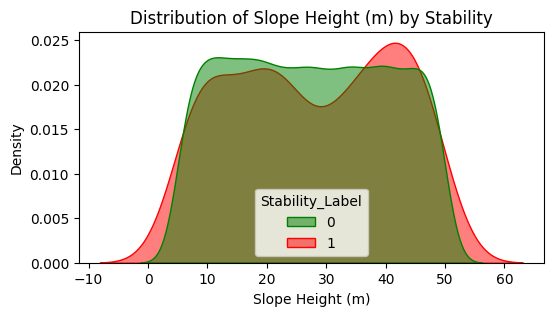

In [ ]:
features = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)', 'Slope Angle (°)', 'Slope Height (m)']

for feature in features:
    plt.figure(figsize=(6,3))
    sns.kdeplot(data=df, x=feature, hue='Stability_Label', fill=True, common_norm=False,
                palette=['green', 'red'], alpha=0.5)
    plt.title(f'Distribution of {feature} by Stability')
    plt.show()



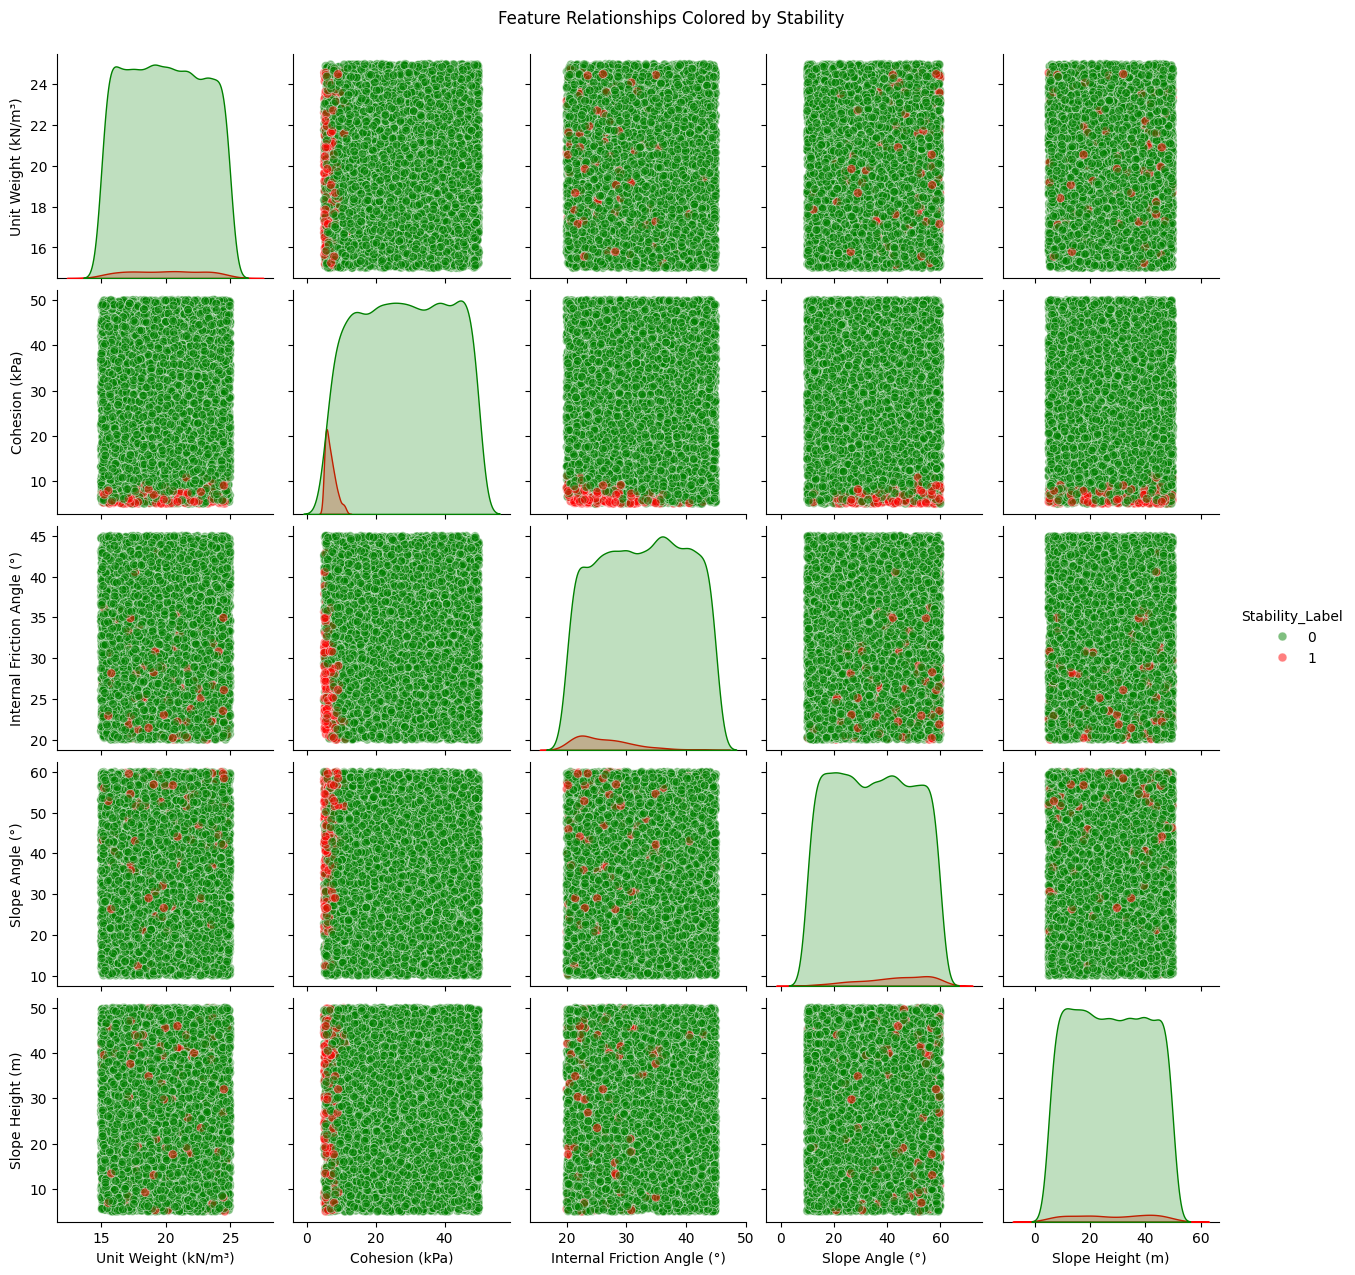

In [ ]:
sns.pairplot(df, vars=features, hue='Stability_Label', palette=['green','red'], plot_kws={'alpha':0.5, 's':40})
plt.suptitle('Feature Relationships Colored by Stability', y=1.02)
plt.show()


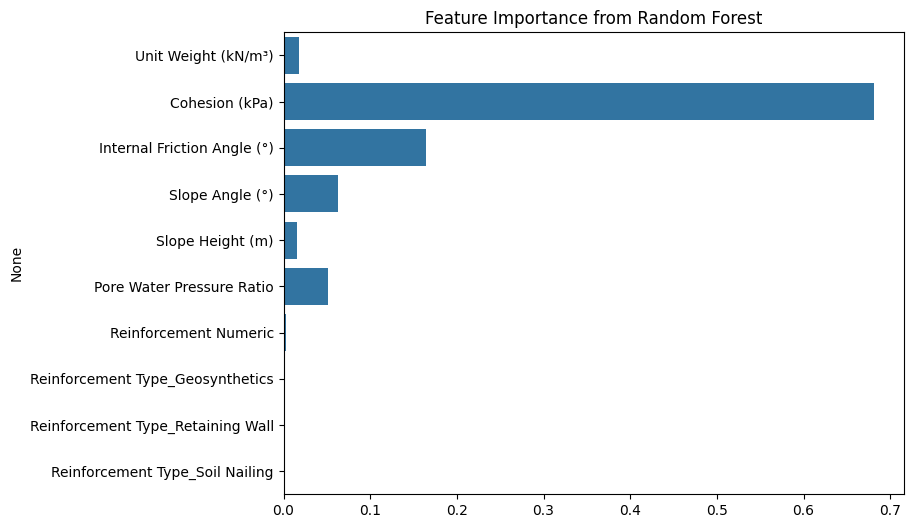

In [ ]:
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importance from Random Forest')
plt.show()


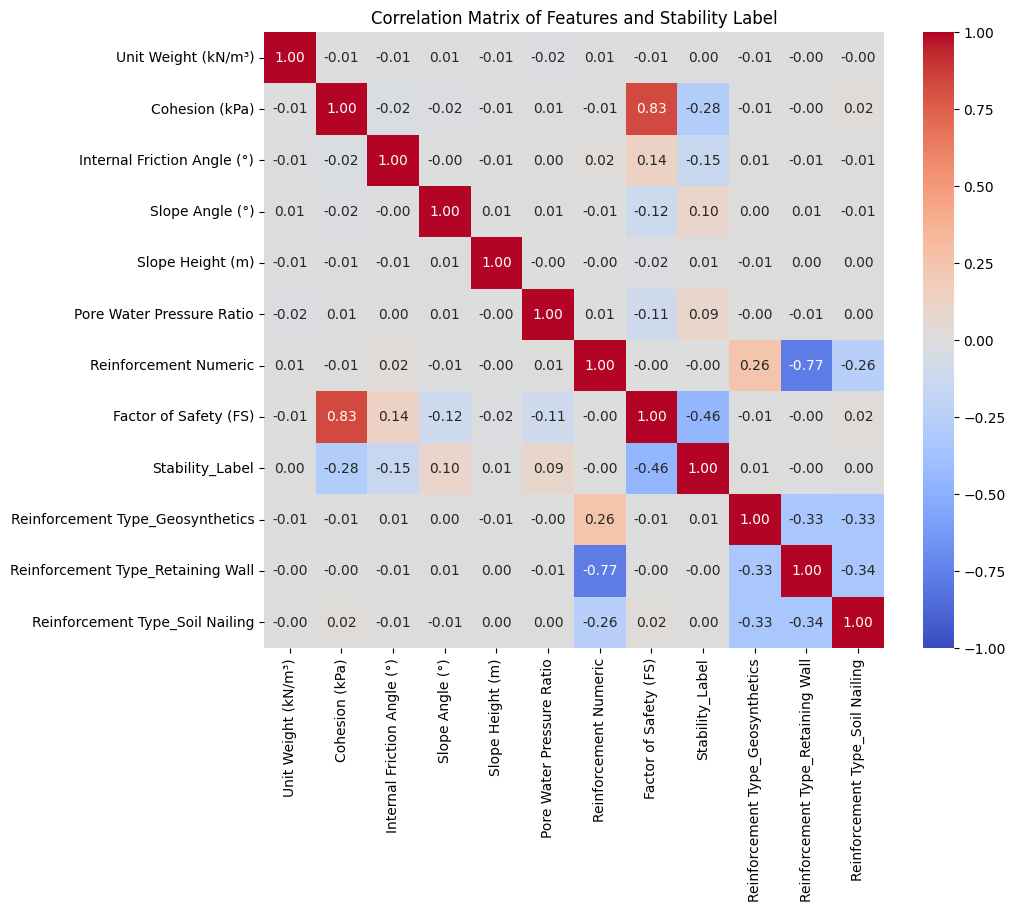

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features and Stability Label')
plt.show()


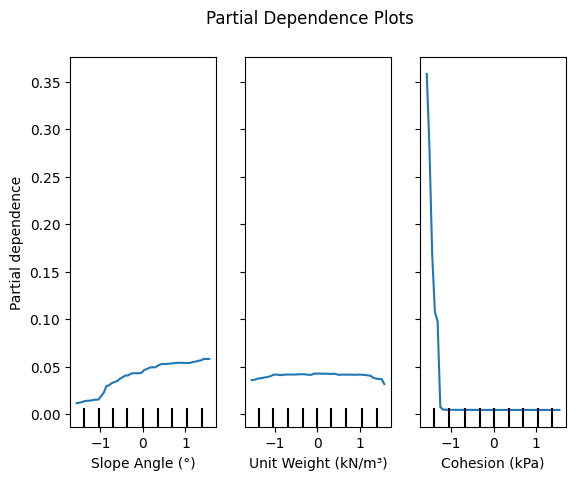

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['Slope Angle (°)', 'Unit Weight (kN/m³)', 'Cohesion (kPa)']

PartialDependenceDisplay.from_estimator(
    rf, X_train_scaled, features=features_to_plot, feature_names=X.columns, grid_resolution=50
)

plt.suptitle('Partial Dependence Plots')
plt.show()



# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score

xgb_model = xgb.XGBClassifier(
    n_estimators=200, max_depth=8, learning_rate=0.1,
    objective='binary:logistic', use_label_encoder=False,
    eval_metric='logloss', random_state=42,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train)
)
xgb_model.fit(X_train_scaled, y_train)
y_pred = xgb_model.predict(X_test_scaled)

print("XGBoost Classification Report")
print(classification_report(y_test, y_pred, target_names=['Stable','Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:30:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report
              precision    recall  f1-score   support

      Stable       1.00      0.99      1.00      1941
    Unstable       0.83      0.85      0.84        59

    accuracy                           0.99      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.99      0.99      0.99      2000

Weighted F1 Score: 0.9905386920550235


## LIGHTGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report, f1_score

lgb_model = lgb.LGBMClassifier(
    n_estimators=200, max_depth=8, learning_rate=0.1,
    class_weight='balanced', random_state=42
)
lgb_model.fit(X_train_scaled, y_train)
y_pred = lgb_model.predict(X_test_scaled)

print("LightGBM Classification Report")
print(classification_report(y_test, y_pred, target_names=['Stable','Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


[LightGBM] [Info] Number of positive: 236, number of negative: 7764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1544
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


# CATBOOST

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score
import numpy as np

class_weights = [1 - np.mean(y_train == 0), 1 - np.mean(y_train == 1)]

cat_model = CatBoostClassifier(
    iterations=200, depth=8, learning_rate=0.1,
    loss_function='Logloss', verbose=0, random_seed=42,
    class_weights=class_weights
)
cat_model.fit(X_train_scaled, y_train)
y_pred = cat_model.predict(X_test_scaled)

print("CatBoost Classification Report")
print(classification_report(y_test, y_pred, target_names=['Stable','Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


CatBoost Classification Report
              precision    recall  f1-score   support

      Stable       1.00      0.99      1.00      1941
    Unstable       0.81      0.95      0.88        59

    accuracy                           0.99      2000
   macro avg       0.91      0.97      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Weighted F1 Score: 0.9923021694214876


# Ensemble Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    voting='soft',  # Use 'soft' for probabilistic averaging
    weights=[2,2,1,1],  # Emphasize tree-based models
    n_jobs=-1
)

ensemble.fit(X_train_scaled, y_train)
y_pred = ensemble.predict(X_test_scaled)

from sklearn.metrics import classification_report, f1_score
print("Ensemble Voting Classifier Classification Report")
print(classification_report(y_test, y_pred, target_names=['Stable', 'Unstable']))
print("Weighted F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Ensemble Voting Classifier Classification Report
              precision    recall  f1-score   support

      Stable       1.00      1.00      1.00      1941
    Unstable       0.85      0.86      0.86        59

    accuracy                           0.99      2000
   macro avg       0.92      0.93      0.93      2000
weighted avg       0.99      0.99      0.99      2000

Weighted F1 Score: 0.9915346192071263


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# AutoML

In [ ]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.4 MB/s eta 0:00:00


In [ ]:
print(hf.columns)


['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)', 'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio', 'Reinforcement Numeric', 'Factor of Safety (FS)', 'Stability_Label', 'Reinforcement Type_Geosynthetics', 'Reinforcement Type_Retaining Wall', 'Reinforcement Type_Soil Nailing']


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Initialize H2O cluster
h2o.init()

# Load your cleaned DataFrame 'df' which has these columns:
# ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
#  'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
#  'Reinforcement Numeric', 'Factor of Safety (FS)', 'Stability_Label',
#  'Reinforcement Type_Geosynthetics', 'Reinforcement Type_Retaining Wall',
#  'Reinforcement Type_Soil Nailing']

# Convert pandas DataFrame to H2OFrame
hf = h2o.H2OFrame(df)

# Convert target column to categorical (factor)
hf['Stability_Label'] = hf['Stability_Label'].asfactor()

# Define target and feature columns
target = 'Stability_Label'
features = list(df.columns)
features.remove('Stability_Label')
features.remove('Factor of Safety (FS)')  # Exclude FS from features

# Split data into train and test frames
train, test = hf.split_frame(ratios=[0.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML(max_models=20, max_runtime_secs=600, seed=42)
aml.train(x=features, y=target, training_frame=train)

# View leaderboard
print(aml.leaderboard)

# Evaluate model on test data
perf = aml.leader.model_performance(test)
print(perf)

# Predict on test data
predictions = aml.leader.predict(test)
print(predictions.head())


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,9 mins 05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 28 days
H2O_cluster_name:,H2O_from_python_unknownUser_ys643o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.153 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   auc     logloss     aucpr    mean_per_class_error       rmse         mse
GLM_1_AutoML_2_20250924_174751                        0.999966  0.00752736  0.9989                 0.010677   0.0427096  0.00182411
GBM_1_AutoML_2_20250924_174751                        0.998812  0.0160264   0.966554               0.0379207  0.0691474  0.00478136
XGBoost_3_AutoML_2_20250924_174751                    0.998777  0.0163339   0.967501               0.0726294  0.0697859  0.00487007
XGBoost_2_AutoML_2_20250924_174751                    0.998614  0.0179609   0.96431                0.0542844  0.0718918  0.00516843
XGBoost_grid_1_AutoML_2_20250924_174751_model_1       0.998499  0.0187086   0.961162               0.0768488  0.0752767  0.00566658
GBM_grid_1_AutoML_